# Median-normalization of the count files ([DESeq2 method](https://scienceparkstudygroup.github.io/research-data-management-lesson/median_of_ratios_manual_normalization/index.html))

In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'+'/Results/Other_papers/Reid_etal.2017.Scientific_Reports'
from IPython.display import display
import pandas as pd
import numpy as np

In [2]:
# Loading the count files
drop_col = ['Chr', 'Start', 'End', 'Strand', 'Length']

RNA_count = pd.read_csv(f'{Project}/Tables/featureCounts/RNA', sep='\t', skiprows=1).drop(columns=drop_col)
RNA_count = RNA_count.rename(columns={'Geneid' : 'gene_id',
                                      'gene_name' : 'gene_name',
                                      'alignments/RNA/Reid_BD0a.sorted.bam' : 'R_BD0a',
                                      'alignments/RNA/Reid_BD0b.sorted.bam' : 'R_BD0b',
                                      'alignments/RNA/Reid_BD5a.sorted.bam' : 'R_BD5a',
                                      'alignments/RNA/Reid_BD5b.sorted.bam' : 'R_BD5b',
                                      'alignments/RNA/Reid_WD0a.sorted.bam' : 'R_WD0a',
                                      'alignments/RNA/Reid_WD0b.sorted.bam' : 'R_WD0b',
                                      'alignments/RNA/Reid_WD5a.sorted.bam' : 'R_WD5a',
                                      'alignments/RNA/Reid_WD5b.sorted.bam' : 'R_WD5b',
                                      'alignments/RNA/Reid_BATa.sorted.bam' : 'R_BATa',
                                      'alignments/RNA/Reid_BATb.sorted.bam' : 'R_BATb',
                                      'alignments/RNA/Reid_WATa.sorted.bam' : 'R_WATa',
                                      'alignments/RNA/Reid_WATb.sorted.bam' : 'R_WATb'})
RNA_count['gene_id'] = RNA_count['gene_id'].str.split('.').str[0]

RPF_count = pd.read_csv(f'{Project}/Tables/featureCounts/RPF', sep='\t', skiprows=1).drop(columns=drop_col)
RPF_count = RPF_count.rename(columns={'Geneid' : 'gene_id',
                                      'gene_name' : 'gene_name',
                                      'alignments/RPF/Reid_BD0a.sorted.bam' : 'P_BD0a',
                                      'alignments/RPF/Reid_BD0b.sorted.bam' : 'P_BD0b',
                                      'alignments/RPF/Reid_BD5a.sorted.bam' : 'P_BD5a',
                                      'alignments/RPF/Reid_BD5b.sorted.bam' : 'P_BD5b',
                                      'alignments/RPF/Reid_WD0a.sorted.bam' : 'P_WD0a',
                                      'alignments/RPF/Reid_WD0b.sorted.bam' : 'P_WD0b',
                                      'alignments/RPF/Reid_WD5a.sorted.bam' : 'P_WD5a',
                                      'alignments/RPF/Reid_WD5b.sorted.bam' : 'P_WD5b',
                                      'alignments/RPF/Reid_BATa.sorted.bam' : 'P_BATa',
                                      'alignments/RPF/Reid_BATb.sorted.bam' : 'P_BATb',
                                      'alignments/RPF/Reid_WATa.sorted.bam' : 'P_WATa',
                                      'alignments/RPF/Reid_WATb.sorted.bam' : 'P_WATb'})
RPF_count['gene_id'] = RPF_count['gene_id'].str.split('.').str[0]

RNA_count = RNA_count.drop(columns=['R_BATa','R_BATb','R_WATa','R_WATb'])
RPF_count = RPF_count.drop(columns=['P_BATa','P_BATb','P_WATa','P_WATb'])

display(RNA_count)
display(RPF_count)

,gene_id,gene_name,R_BD0a,R_BD0b,R_BD5a,R_BD5b,R_WD0a,R_WD0b,R_WD5a,R_WD5b
0,ENSMUSG00000102693,4933401J01Rik,0,0,1,0,0,0,0,0
1,ENSMUSG00000064842,Gm26206,0,0,0,0,0,0,0,0
2,ENSMUSG00000051951,Xkr4,79,62,12,2,50,41,10,7
3,ENSMUSG00000102851,Gm18956,0,0,0,0,0,0,0,0
4,ENSMUSG00000103377,Gm37180,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368,mt-Nd6,9703,7226,48050,32923,11847,11960,10987,11944
55355,ENSMUSG00000064369,mt-Te,39,32,165,81,55,48,67,59
55356,ENSMUSG00000064370,mt-Cytb,44881,40772,147398,92269,58871,60189,44601,50466
55357,ENSMUSG00000064371,mt-Tt,2,4,254,166,8,4,58,81


,gene_id,gene_name,P_BD0a,P_BD0b,P_BD5a,P_BD5b,P_WD0a,P_WD0b,P_WD5a,P_WD5b
0,ENSMUSG00000102693,4933401J01Rik,0,0,0,0,0,0,0,0
1,ENSMUSG00000064842,Gm26206,0,0,0,0,0,0,0,0
2,ENSMUSG00000051951,Xkr4,3,4,0,0,0,0,2,0
3,ENSMUSG00000102851,Gm18956,0,0,0,0,0,0,0,0
4,ENSMUSG00000103377,Gm37180,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368,mt-Nd6,371,376,2386,2831,467,654,3214,3332
55355,ENSMUSG00000064369,mt-Te,0,1,4,4,0,0,10,6
55356,ENSMUSG00000064370,mt-Cytb,556,460,3964,3541,465,576,3774,4142
55357,ENSMUSG00000064371,mt-Tt,11,9,13,5,3,3,22,27


In [3]:
RNA_count_tmp = RNA_count.copy()
RNA_count_tmp.iloc[:,2:] = np.log(RNA_count_tmp.iloc[:,2:])
RNA_count_tmp = RNA_count_tmp.replace(-np.inf, np.nan).dropna()
RNA_count_tmp['pseudo_reference'] = RNA_count_tmp.iloc[:,2:].mean(axis=1)
for SP in RNA_count_tmp.iloc[:,2:11]:
    RNA_count_tmp[SP] = RNA_count_tmp[SP] - RNA_count_tmp['pseudo_reference']
RNA_count_tmp = RNA_count_tmp.drop(columns='pseudo_reference')
RNA_scaling_factor = [np.exp(i) for i in RNA_count_tmp.iloc[:,2:].median().tolist()]

RPF_count_tmp = RPF_count.copy()
RPF_count_tmp.iloc[:,2:] = np.log(RPF_count_tmp.iloc[:,2:])
RPF_count_tmp = RPF_count_tmp.replace(-np.inf, np.nan).dropna()
RPF_count_tmp['pseudo_reference'] = RPF_count_tmp.iloc[:,2:].mean(axis=1)
for SP in RPF_count_tmp.iloc[:,2:11]:
    RPF_count_tmp[SP] = RPF_count_tmp[SP] - RPF_count_tmp['pseudo_reference']
RPF_count_tmp = RPF_count_tmp.drop(columns='pseudo_reference')
RPF_scaling_factor = [np.exp(i) for i in RPF_count_tmp.iloc[:,2:].median().tolist()]

display(RNA_scaling_factor)
display(RPF_scaling_factor)

/Users/daehwa/miniconda3/envs/univ/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/daehwa/miniconda3/envs/univ/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


[1.1688271251214413,
 1.1347298031974147,
 0.9355128636581342,
 0.4889886986736284,
 1.8288521509264477,
 1.6898086795469995,
 0.6211616047612853,
 0.9827598807258825]

[0.5501894975329333,
 0.4998494195530465,
 1.509646153990726,
 1.5536839787400203,
 0.7556506979652773,
 1.0431214321659719,
 1.5520695475414186,
 1.5352160232370036]

In [4]:
RNA_Ncount = RNA_count.copy()
for SP, SF in zip(RNA_Ncount.iloc[:,2:], RNA_scaling_factor):
    RNA_Ncount[SP] = RNA_Ncount[SP] / SF

RPF_Ncount = RPF_count.copy()
for SP, SF in zip(RPF_Ncount.iloc[:,2:], RPF_scaling_factor):
    RPF_Ncount[SP] = RPF_Ncount[SP] / SF

display(RNA_Ncount)
display(RPF_Ncount)

,gene_id,gene_name,R_BD0a,R_BD0b,R_BD5a,R_BD5b,R_WD0a,R_WD0b,R_WD5a,R_WD5b
0,ENSMUSG00000102693,4933401J01Rik,0.000000,0.000000,1.068932,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSMUSG00000064842,Gm26206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSMUSG00000051951,Xkr4,67.589123,54.638558,12.827189,4.090074,27.339553,24.263102,16.098870,7.122798
3,ENSMUSG00000102851,Gm18956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSMUSG00000103377,Gm37180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368,mt-Nd6,8301.484276,6368.035791,51362.201277,67328.754405,6477.833648,7077.724327,17687.828603,12153.528277
55355,ENSMUSG00000064369,mt-Te,33.366782,28.200546,176.373844,165.648000,30.073508,28.405583,107.862430,60.035011
55356,ENSMUSG00000064370,mt-Cytb,38398.321732,35931.020658,157558.496228,188693.522468,32190.136294,35618.825213,71802.570632,51351.302581
55357,ENSMUSG00000064371,mt-Tt,1.711117,3.525068,271.508827,339.476148,4.374328,2.367132,93.373447,82.420947


,gene_id,gene_name,P_BD0a,P_BD0b,P_BD5a,P_BD5b,P_WD0a,P_WD0b,P_WD5a,P_WD5b
0,ENSMUSG00000102693,4933401J01Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSMUSG00000064842,Gm26206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSMUSG00000051951,Xkr4,5.452667,8.002410,0.000000,0.000000,0.000000,0.000000,1.288602,0.000000
3,ENSMUSG00000102851,Gm18956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSMUSG00000103377,Gm37180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368,mt-Nd6,674.313126,752.226541,1580.502818,1822.120868,618.010413,626.964397,2070.783494,2170.378598
55355,ENSMUSG00000064369,mt-Te,0.000000,2.000603,2.649628,2.574526,0.000000,0.000000,6.443010,3.908245
55356,ENSMUSG00000064370,mt-Cytb,1010.560911,920.277151,2625.780876,2279.099256,615.363688,552.188827,2431.592067,2697.991642
55357,ENSMUSG00000064371,mt-Tt,19.993112,18.005423,8.611289,3.218158,3.970088,2.875983,14.174623,17.587101


# Cut off the genes

In [5]:
# Cut the genes with low expression
cut = 20

slct = (((RNA_Ncount[['R_BD0a','R_BD0b']] > cut).T.sum() == 2) | 
        ((RNA_Ncount[['R_BD5a','R_BD5b']] > cut).T.sum() == 2) | 
        ((RNA_Ncount[['R_WD0a','R_WD0b']] > cut).T.sum() == 2) | 
        ((RNA_Ncount[['R_WD5a','R_WD5b']] > cut).T.sum() == 2))
RNA_Ncount = RNA_Ncount[slct].reset_index(drop=True)

cut = 5

slct = (((RPF_Ncount[['P_BD0a','P_BD0b']] > cut).T.sum() == 2) | 
        ((RPF_Ncount[['P_BD5a','P_BD5b']] > cut).T.sum() == 2) | 
        ((RPF_Ncount[['P_WD0a','P_WD0b']] > cut).T.sum() == 2) | 
        ((RPF_Ncount[['P_WD5a','P_WD5b']] > cut).T.sum() == 2))
RPF_Ncount = RPF_Ncount[slct].reset_index(drop=True)

display(RNA_Ncount)
display(RPF_Ncount)

,gene_id,gene_name,R_BD0a,R_BD0b,R_BD5a,R_BD5b,R_WD0a,R_WD0b,R_WD5a,R_WD5b
0,ENSMUSG00000051951,Xkr4,67.589123,54.638558,12.827189,4.090074,27.339553,24.263102,16.098870,7.122798
1,ENSMUSG00000033845,Mrpl15,294.312129,295.224466,1055.036268,1102.274964,251.523886,275.770864,943.393789,1016.525012
2,ENSMUSG00000025903,Lypla1,328.534470,249.398579,647.773028,660.546963,253.164259,265.710554,338.076273,313.403107
3,ENSMUSG00000033813,Tcea1,1260.237693,1140.359578,1212.169329,1247.472593,1183.802638,1201.911213,565.070341,565.753661
4,ENSMUSG00000033793,Atp6v1h,1018.114633,924.449148,823.077939,963.212445,846.432556,853.351043,888.657631,897.472534
...,...,...,...,...,...,...,...,...,...,...
13560,ENSMUSG00000064368,mt-Nd6,8301.484276,6368.035791,51362.201277,67328.754405,6477.833648,7077.724327,17687.828603,12153.528277
13561,ENSMUSG00000064369,mt-Te,33.366782,28.200546,176.373844,165.648000,30.073508,28.405583,107.862430,60.035011
13562,ENSMUSG00000064370,mt-Cytb,38398.321732,35931.020658,157558.496228,188693.522468,32190.136294,35618.825213,71802.570632,51351.302581
13563,ENSMUSG00000064371,mt-Tt,1.711117,3.525068,271.508827,339.476148,4.374328,2.367132,93.373447,82.420947


,gene_id,gene_name,P_BD0a,P_BD0b,P_BD5a,P_BD5b,P_WD0a,P_WD0b,P_WD5a,P_WD5b
0,ENSMUSG00000051951,Xkr4,5.452667,8.002410,0.000000,0.000000,0.000000,0.000000,1.288602,0.000000
1,ENSMUSG00000103922,Gm6123,0.000000,0.000000,5.961662,10.941736,5.293451,0.958661,8.375913,7.816490
2,ENSMUSG00000033845,Mrpl15,10.905334,18.005423,62.266247,62.432259,17.203716,27.801174,41.879567,55.366801
3,ENSMUSG00000025903,Lypla1,1.817556,6.001808,5.961662,5.149052,1.323363,0.958661,2.577204,2.605497
4,ENSMUSG00000033813,Tcea1,5.452667,6.001808,33.120344,19.308946,37.054158,39.305107,17.396128,18.238476
...,...,...,...,...,...,...,...,...,...,...
9974,ENSMUSG00000064367,mt-Nd5,527.091123,462.139178,1249.961784,1189.431072,349.367771,355.663290,1242.212376,1443.445070
9975,ENSMUSG00000064368,mt-Nd6,674.313126,752.226541,1580.502818,1822.120868,618.010413,626.964397,2070.783494,2170.378598
9976,ENSMUSG00000064370,mt-Cytb,1010.560911,920.277151,2625.780876,2279.099256,615.363688,552.188827,2431.592067,2697.991642
9977,ENSMUSG00000064371,mt-Tt,19.993112,18.005423,8.611289,3.218158,3.970088,2.875983,14.174623,17.587101


In [6]:
# Selecting protein coding genes
import gzip
import csv

gtf_file = gzip.open('/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GTF/gencode.vM27.annotation.gtf.gz', 'rt')
raw_info = csv.reader(gtf_file, dialect='excel-tab')

protein_coding=[]
for line in raw_info:
    if line[0].startswith("#"):
        continue
    if line[2].startswith("gene") and 'protein_coding' in line[8]:
        gene_id = line[8].split(';')[0].split('"')[1].rstrip('"').split('.')[0]
        protein_coding.append(gene_id)

print(protein_coding[:5])
print(f'Number of protein-coding genes {len(protein_coding)}')

['ENSMUSG00000051951', 'ENSMUSG00000025900', 'ENSMUSG00000025902', 'ENSMUSG00000033845', 'ENSMUSG00000025903']
Number of protein-coding genes 21834


In [7]:
RNA_Ncount = RNA_Ncount[RNA_Ncount['gene_id'].isin(protein_coding)].reset_index(drop=True)
RPF_Ncount = RPF_Ncount[RPF_Ncount['gene_id'].isin(protein_coding)].reset_index(drop=True)

display(RNA_Ncount)
display(RPF_Ncount)

,gene_id,gene_name,R_BD0a,R_BD0b,R_BD5a,R_BD5b,R_WD0a,R_WD0b,R_WD5a,R_WD5b
0,ENSMUSG00000051951,Xkr4,67.589123,54.638558,12.827189,4.090074,27.339553,24.263102,16.098870,7.122798
1,ENSMUSG00000033845,Mrpl15,294.312129,295.224466,1055.036268,1102.274964,251.523886,275.770864,943.393789,1016.525012
2,ENSMUSG00000025903,Lypla1,328.534470,249.398579,647.773028,660.546963,253.164259,265.710554,338.076273,313.403107
3,ENSMUSG00000033813,Tcea1,1260.237693,1140.359578,1212.169329,1247.472593,1183.802638,1201.911213,565.070341,565.753661
4,ENSMUSG00000033793,Atp6v1h,1018.114633,924.449148,823.077939,963.212445,846.432556,853.351043,888.657631,897.472534
...,...,...,...,...,...,...,...,...,...,...
12135,ENSMUSG00000065947,mt-Nd4l,4.277793,11.456472,328.162243,28.630519,5.467911,5.326047,16.098870,5.087713
12136,ENSMUSG00000064363,mt-Nd4,5247.995934,5009.121981,25562.449143,33861.723277,4489.154575,5028.971684,12193.284231,7694.656801
12137,ENSMUSG00000064367,mt-Nd5,31233.019165,26771.130814,137331.088637,173255.537868,22537.086981,25895.239224,56413.660682,40355.737732
12138,ENSMUSG00000064368,mt-Nd6,8301.484276,6368.035791,51362.201277,67328.754405,6477.833648,7077.724327,17687.828603,12153.528277


,gene_id,gene_name,P_BD0a,P_BD0b,P_BD5a,P_BD5b,P_WD0a,P_WD0b,P_WD5a,P_WD5b
0,ENSMUSG00000051951,Xkr4,5.452667,8.002410,0.000000,0.000000,0.000000,0.000000,1.288602,0.000000
1,ENSMUSG00000033845,Mrpl15,10.905334,18.005423,62.266247,62.432259,17.203716,27.801174,41.879567,55.366801
2,ENSMUSG00000025903,Lypla1,1.817556,6.001808,5.961662,5.149052,1.323363,0.958661,2.577204,2.605497
3,ENSMUSG00000033813,Tcea1,5.452667,6.001808,33.120344,19.308946,37.054158,39.305107,17.396128,18.238476
4,ENSMUSG00000033793,Atp6v1h,59.979335,52.015665,105.985101,94.613835,100.575570,100.659422,116.618485,88.586882
...,...,...,...,...,...,...,...,...,...,...
9556,ENSMUSG00000065947,mt-Nd4l,1.817556,2.000603,7.948883,3.861789,1.323363,2.875983,13.530322,10.421986
9557,ENSMUSG00000064363,mt-Nd4,134.499114,166.050008,422.615590,372.019026,93.958757,98.742099,572.783611,577.768852
9558,ENSMUSG00000064367,mt-Nd5,527.091123,462.139178,1249.961784,1189.431072,349.367771,355.663290,1242.212376,1443.445070
9559,ENSMUSG00000064368,mt-Nd6,674.313126,752.226541,1580.502818,1822.120868,618.010413,626.964397,2070.783494,2170.378598


In [8]:
# Add 1 pseudocount
RNA_Ncount.iloc[:,2:] += 1
RPF_Ncount.iloc[:,2:] += 1

display(RNA_Ncount)
display(RPF_Ncount)

,gene_id,gene_name,R_BD0a,R_BD0b,R_BD5a,R_BD5b,R_WD0a,R_WD0b,R_WD5a,R_WD5b
0,ENSMUSG00000051951,Xkr4,68.589123,55.638558,13.827189,5.090074,28.339553,25.263102,17.098870,8.122798
1,ENSMUSG00000033845,Mrpl15,295.312129,296.224466,1056.036268,1103.274964,252.523886,276.770864,944.393789,1017.525012
2,ENSMUSG00000025903,Lypla1,329.534470,250.398579,648.773028,661.546963,254.164259,266.710554,339.076273,314.403107
3,ENSMUSG00000033813,Tcea1,1261.237693,1141.359578,1213.169329,1248.472593,1184.802638,1202.911213,566.070341,566.753661
4,ENSMUSG00000033793,Atp6v1h,1019.114633,925.449148,824.077939,964.212445,847.432556,854.351043,889.657631,898.472534
...,...,...,...,...,...,...,...,...,...,...
12135,ENSMUSG00000065947,mt-Nd4l,5.277793,12.456472,329.162243,29.630519,6.467911,6.326047,17.098870,6.087713
12136,ENSMUSG00000064363,mt-Nd4,5248.995934,5010.121981,25563.449143,33862.723277,4490.154575,5029.971684,12194.284231,7695.656801
12137,ENSMUSG00000064367,mt-Nd5,31234.019165,26772.130814,137332.088637,173256.537868,22538.086981,25896.239224,56414.660682,40356.737732
12138,ENSMUSG00000064368,mt-Nd6,8302.484276,6369.035791,51363.201277,67329.754405,6478.833648,7078.724327,17688.828603,12154.528277


,gene_id,gene_name,P_BD0a,P_BD0b,P_BD5a,P_BD5b,P_WD0a,P_WD0b,P_WD5a,P_WD5b
0,ENSMUSG00000051951,Xkr4,6.452667,9.002410,1.000000,1.000000,1.000000,1.000000,2.288602,1.000000
1,ENSMUSG00000033845,Mrpl15,11.905334,19.005423,63.266247,63.432259,18.203716,28.801174,42.879567,56.366801
2,ENSMUSG00000025903,Lypla1,2.817556,7.001808,6.961662,6.149052,2.323363,1.958661,3.577204,3.605497
3,ENSMUSG00000033813,Tcea1,6.452667,7.001808,34.120344,20.308946,38.054158,40.305107,18.396128,19.238476
4,ENSMUSG00000033793,Atp6v1h,60.979335,53.015665,106.985101,95.613835,101.575570,101.659422,117.618485,89.586882
...,...,...,...,...,...,...,...,...,...,...
9556,ENSMUSG00000065947,mt-Nd4l,2.817556,3.000603,8.948883,4.861789,2.323363,3.875983,14.530322,11.421986
9557,ENSMUSG00000064363,mt-Nd4,135.499114,167.050008,423.615590,373.019026,94.958757,99.742099,573.783611,578.768852
9558,ENSMUSG00000064367,mt-Nd5,528.091123,463.139178,1250.961784,1190.431072,350.367771,356.663290,1243.212376,1444.445070
9559,ENSMUSG00000064368,mt-Nd6,675.313126,753.226541,1581.502818,1823.120868,619.010413,627.964397,2071.783494,2171.378598


# FC calculation

In [9]:
# FC
groups = ['BD','WD']
Conds = ['5']
reps = ['a','b']

RNA_FC = pd.DataFrame()
RNA_FC['gene_id'] = RNA_Ncount['gene_id']
RNA_FC['gene_name'] = RNA_Ncount['gene_name']
for group in groups:
    for Cond in Conds:
        for rep in reps:
            RNA_FC['R_'+group+Cond+rep] = RNA_Ncount['R_'+group+Cond+rep] / RNA_Ncount['R_'+group+'0'+rep]
   
RPF_FC = pd.DataFrame()
RPF_FC['gene_id'] = RPF_Ncount['gene_id']
RPF_FC['gene_name'] = RPF_Ncount['gene_name']
for group in groups:
    for Cond in Conds:
        for rep in reps:
            RPF_FC['P_'+group+Cond+rep] = RPF_Ncount['P_'+group+Cond+rep] / RPF_Ncount['P_'+group+'0'+rep]

display(RNA_FC)
display(RPF_FC)

,gene_id,gene_name,R_BD5a,R_BD5b,R_WD5a,R_WD5b
0,ENSMUSG00000051951,Xkr4,0.201594,0.091485,0.603357,0.321528
1,ENSMUSG00000033845,Mrpl15,3.576000,3.724456,3.739820,3.676417
2,ENSMUSG00000025903,Lypla1,1.968756,2.641976,1.334083,1.178818
3,ENSMUSG00000033813,Tcea1,0.961888,1.093847,0.477776,0.471152
4,ENSMUSG00000033793,Atp6v1h,0.808621,1.041886,1.049827,1.051643
...,...,...,...,...,...,...
12135,ENSMUSG00000065947,mt-Nd4l,62.367408,2.378725,2.643647,0.962325
12136,ENSMUSG00000064363,mt-Nd4,4.870160,6.758862,2.715783,1.529960
12137,ENSMUSG00000064367,mt-Nd5,4.396875,6.471526,2.503081,1.558401
12138,ENSMUSG00000064368,mt-Nd6,6.186486,10.571420,2.730249,1.717051


,gene_id,gene_name,P_BD5a,P_BD5b,P_WD5a,P_WD5b
0,ENSMUSG00000051951,Xkr4,0.154975,0.111081,2.288602,1.000000
1,ENSMUSG00000033845,Mrpl15,5.314110,3.337587,2.355539,1.957101
2,ENSMUSG00000025903,Lypla1,2.470816,0.878209,1.539667,1.840796
3,ENSMUSG00000033813,Tcea1,5.287790,2.900529,0.483420,0.477321
4,ENSMUSG00000033793,Atp6v1h,1.754448,1.803502,1.157941,0.881245
...,...,...,...,...,...,...
9556,ENSMUSG00000065947,mt-Nd4l,3.176116,1.620271,6.254005,2.946861
9557,ENSMUSG00000064363,mt-Nd4,3.126335,2.232978,6.042451,5.802654
9558,ENSMUSG00000064367,mt-Nd5,2.368837,2.570353,3.548307,4.049884
9559,ENSMUSG00000064368,mt-Nd6,2.341881,2.420415,3.346928,3.457805


In [10]:
# logFC
RNA_logFC = RNA_FC.copy()
RNA_logFC.iloc[:,2:] = np.log2(RNA_FC.iloc[:,2:])
   
RPF_logFC = RPF_FC.copy()
RPF_logFC.iloc[:,2:] = np.log2(RPF_FC.iloc[:,2:])

display(RNA_logFC)
display(RPF_logFC)

,gene_id,gene_name,R_BD5a,R_BD5b,R_WD5a,R_WD5b
0,ENSMUSG00000051951,Xkr4,-2.310472,-3.450326,-0.728916,-1.636983
1,ENSMUSG00000033845,Mrpl15,1.838347,1.897030,1.902969,1.878300
2,ENSMUSG00000025903,Lypla1,0.977284,1.401617,0.415849,0.237341
3,ENSMUSG00000033813,Tcea1,-0.056059,0.129411,-1.065594,-1.085736
4,ENSMUSG00000033793,Atp6v1h,-0.306464,0.059197,0.070152,0.072645
...,...,...,...,...,...,...
12135,ENSMUSG00000065947,mt-Nd4l,5.962720,1.250188,1.402529,-0.055404
12136,ENSMUSG00000064363,mt-Nd4,2.283969,2.756780,1.441368,0.613494
12137,ENSMUSG00000064367,mt-Nd5,2.136479,2.694106,1.323705,0.640067
12138,ENSMUSG00000064368,mt-Nd6,2.629120,3.402097,1.449032,0.779933


,gene_id,gene_name,P_BD5a,P_BD5b,P_WD5a,P_WD5b
0,ENSMUSG00000051951,Xkr4,-2.689896,-3.170311,1.194467,0.000000
1,ENSMUSG00000033845,Mrpl15,2.409828,1.738806,1.236057,0.968718
2,ENSMUSG00000025903,Lypla1,1.304988,-0.187363,0.622618,0.880330
3,ENSMUSG00000033813,Tcea1,2.402665,1.536316,-1.048652,-1.066968
4,ENSMUSG00000033793,Atp6v1h,0.811018,0.850801,0.211561,-0.182385
...,...,...,...,...,...,...
9556,ENSMUSG00000065947,mt-Nd4l,1.667263,0.696235,2.644780,1.559179
9557,ENSMUSG00000064363,mt-Nd4,1.644472,1.158969,2.595134,2.536713
9558,ENSMUSG00000064367,mt-Nd5,1.244179,1.361966,1.827131,2.017881
9559,ENSMUSG00000064368,mt-Nd6,1.227668,1.275254,1.742838,1.789857


In [11]:
# avg logFC
Conds = ['BD5','WD5']
reps = ['a','b']

RNA_avg_logFC = pd.DataFrame()
RNA_avg_logFC['gene_id'] = RNA_logFC['gene_id']
RNA_avg_logFC['gene_name'] = RNA_logFC['gene_name']
for Cond in Conds:
    RNA_avg_logFC['R_'+Cond] = RNA_logFC[['R_'+Cond+rep for rep in reps]].mean(axis=1)
   
RPF_avg_logFC = pd.DataFrame()
RPF_avg_logFC['gene_id'] = RPF_logFC['gene_id']
RPF_avg_logFC['gene_name'] = RPF_logFC['gene_name']
for Cond in Conds:
    RPF_avg_logFC['P_'+Cond] = RPF_logFC[['P_'+Cond+rep for rep in reps]].mean(axis=1)

display(RNA_avg_logFC)
display(RPF_avg_logFC)

,gene_id,gene_name,R_BD5,R_WD5
0,ENSMUSG00000051951,Xkr4,-2.880399,-1.182950
1,ENSMUSG00000033845,Mrpl15,1.867688,1.890634
2,ENSMUSG00000025903,Lypla1,1.189451,0.326595
3,ENSMUSG00000033813,Tcea1,0.036676,-1.075665
4,ENSMUSG00000033793,Atp6v1h,-0.123633,0.071399
...,...,...,...,...
12135,ENSMUSG00000065947,mt-Nd4l,3.606454,0.673563
12136,ENSMUSG00000064363,mt-Nd4,2.520375,1.027431
12137,ENSMUSG00000064367,mt-Nd5,2.415292,0.981886
12138,ENSMUSG00000064368,mt-Nd6,3.015609,1.114483


,gene_id,gene_name,P_BD5,P_WD5
0,ENSMUSG00000051951,Xkr4,-2.930103,0.597233
1,ENSMUSG00000033845,Mrpl15,2.074317,1.102388
2,ENSMUSG00000025903,Lypla1,0.558812,0.751474
3,ENSMUSG00000033813,Tcea1,1.969490,-1.057810
4,ENSMUSG00000033793,Atp6v1h,0.830909,0.014588
...,...,...,...,...
9556,ENSMUSG00000065947,mt-Nd4l,1.181749,2.101980
9557,ENSMUSG00000064363,mt-Nd4,1.401721,2.565923
9558,ENSMUSG00000064367,mt-Nd5,1.303073,1.922506
9559,ENSMUSG00000064368,mt-Nd6,1.251461,1.766347


# RD & FC calculation

In [12]:
merge_data = pd.merge(RNA_Ncount, RPF_Ncount.drop(columns='gene_name'), on='gene_id')
merge_data

,gene_id,gene_name,R_BD0a,R_BD0b,R_BD5a,R_BD5b,R_WD0a,R_WD0b,R_WD5a,R_WD5b,P_BD0a,P_BD0b,P_BD5a,P_BD5b,P_WD0a,P_WD0b,P_WD5a,P_WD5b
0,ENSMUSG00000051951,Xkr4,68.589123,55.638558,13.827189,5.090074,28.339553,25.263102,17.098870,8.122798,6.452667,9.002410,1.000000,1.000000,1.000000,1.000000,2.288602,1.000000
1,ENSMUSG00000033845,Mrpl15,295.312129,296.224466,1056.036268,1103.274964,252.523886,276.770864,944.393789,1017.525012,11.905334,19.005423,63.266247,63.432259,18.203716,28.801174,42.879567,56.366801
2,ENSMUSG00000025903,Lypla1,329.534470,250.398579,648.773028,661.546963,254.164259,266.710554,339.076273,314.403107,2.817556,7.001808,6.961662,6.149052,2.323363,1.958661,3.577204,3.605497
3,ENSMUSG00000033813,Tcea1,1261.237693,1141.359578,1213.169329,1248.472593,1184.802638,1202.911213,566.070341,566.753661,6.452667,7.001808,34.120344,20.308946,38.054158,40.305107,18.396128,19.238476
4,ENSMUSG00000033793,Atp6v1h,1019.114633,925.449148,824.077939,964.212445,847.432556,854.351043,889.657631,898.472534,60.979335,53.015665,106.985101,95.613835,101.575570,101.659422,117.618485,89.586882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9513,ENSMUSG00000065947,mt-Nd4l,5.277793,12.456472,329.162243,29.630519,6.467911,6.326047,17.098870,6.087713,2.817556,3.000603,8.948883,4.861789,2.323363,3.875983,14.530322,11.421986
9514,ENSMUSG00000064363,mt-Nd4,5248.995934,5010.121981,25563.449143,33862.723277,4490.154575,5029.971684,12194.284231,7695.656801,135.499114,167.050008,423.615590,373.019026,94.958757,99.742099,573.783611,578.768852
9515,ENSMUSG00000064367,mt-Nd5,31234.019165,26772.130814,137332.088637,173256.537868,22538.086981,25896.239224,56414.660682,40356.737732,528.091123,463.139178,1250.961784,1190.431072,350.367771,356.663290,1243.212376,1444.445070
9516,ENSMUSG00000064368,mt-Nd6,8302.484276,6369.035791,51363.201277,67329.754405,6478.833648,7078.724327,17688.828603,12154.528277,675.313126,753.226541,1581.502818,1823.120868,619.010413,627.964397,2071.783494,2171.378598


In [13]:
# RD
RD = pd.DataFrame()
RD['gene_id'] = merge_data['gene_id']
RD['gene_name'] = merge_data['gene_name']

for Cond in ['BD0','BD5','WD0','WD5']:
    for rep in ['a','b']:
      RD[f'RD_{Cond}{rep}'] = merge_data[f'P_{Cond}{rep}'] / merge_data[f'R_{Cond}{rep}']

RD

,gene_id,gene_name,RD_BD0a,RD_BD0b,RD_BD5a,RD_BD5b,RD_WD0a,RD_WD0b,RD_WD5a,RD_WD5b
0,ENSMUSG00000051951,Xkr4,0.094077,0.161802,0.072321,0.196461,0.035286,0.039583,0.133845,0.123110
1,ENSMUSG00000033845,Mrpl15,0.040314,0.064159,0.059909,0.057495,0.072087,0.104061,0.045404,0.055396
2,ENSMUSG00000025903,Lypla1,0.008550,0.027963,0.010731,0.009295,0.009141,0.007344,0.010550,0.011468
3,ENSMUSG00000033813,Tcea1,0.005116,0.006135,0.028125,0.016267,0.032119,0.033506,0.032498,0.033945
4,ENSMUSG00000033793,Atp6v1h,0.059836,0.057286,0.129824,0.099163,0.119863,0.118990,0.132206,0.099710
...,...,...,...,...,...,...,...,...,...,...
9513,ENSMUSG00000065947,mt-Nd4l,0.533851,0.240887,0.027187,0.164080,0.359214,0.612702,0.849783,1.876236
9514,ENSMUSG00000064363,mt-Nd4,0.025814,0.033343,0.016571,0.011016,0.021148,0.019830,0.047053,0.075207
9515,ENSMUSG00000064367,mt-Nd5,0.016908,0.017299,0.009109,0.006871,0.015546,0.013773,0.022037,0.035792
9516,ENSMUSG00000064368,mt-Nd6,0.081339,0.118264,0.030791,0.027077,0.095543,0.088712,0.117124,0.178648


In [14]:
# log2_RD
log2_RD = RD.copy()
log2_RD.iloc[:,2:] = np.log2(RD.iloc[:,2:])

log2_RD

,gene_id,gene_name,RD_BD0a,RD_BD0b,RD_BD5a,RD_BD5b,RD_WD0a,RD_WD0b,RD_WD5a,RD_WD5b
0,ENSMUSG00000051951,Xkr4,-3.410012,-2.627702,-3.789436,-2.347687,-4.824745,-4.658960,-2.901362,-3.021977
1,ENSMUSG00000033845,Mrpl15,-4.632561,-3.962208,-4.061080,-4.120432,-3.794115,-3.264493,-4.461026,-4.174075
2,ENSMUSG00000025903,Lypla1,-6.869841,-5.160355,-6.542138,-6.749336,-6.773403,-7.089263,-6.566634,-6.446274
3,ENSMUSG00000033813,Tcea1,-7.610729,-7.348810,-5.152005,-5.941905,-4.960449,-4.899424,-4.943507,-4.880655
4,ENSMUSG00000033793,Atp6v1h,-4.062852,-4.125663,-2.945371,-3.334060,-3.060545,-3.071085,-2.919135,-3.326115
...,...,...,...,...,...,...,...,...,...,...
9513,ENSMUSG00000065947,mt-Nd4l,-0.905491,-2.053571,-5.200948,-2.607525,-1.477085,-0.706742,-0.234834,0.907841
9514,ENSMUSG00000064363,mt-Nd4,-5.275686,-4.906494,-5.915183,-6.504305,-5.563320,-5.656204,-4.409555,-3.732985
9515,ENSMUSG00000064367,mt-Nd5,-5.886188,-5.853142,-6.778487,-7.185282,-6.007351,-6.182036,-5.503925,-4.804222
9516,ENSMUSG00000064368,mt-Nd6,-3.619915,-3.079919,-5.021367,-5.206762,-3.387699,-3.494735,-3.093893,-2.484811


In [15]:
# RD FC
groups = ['BD','WD']
Conds = ['5']
reps = ['a','b']

RD_FC = pd.DataFrame()
RD_FC['gene_id'] = RD['gene_id']
RD_FC['gene_name'] = RD['gene_name']
for group in groups:
    for Cond in Conds:
        for rep in reps:
            RD_FC['RD_'+group+Cond+rep] = RD['RD_'+group+Cond+rep] / RD['RD_'+group+'0'+rep]

display(RD_FC)

,gene_id,gene_name,RD_BD5a,RD_BD5b,RD_WD5a,RD_WD5b
0,ENSMUSG00000051951,Xkr4,0.768745,1.214208,3.793114,3.110148
1,ENSMUSG00000033845,Mrpl15,1.486048,0.896128,0.629854,0.532339
2,ENSMUSG00000025903,Lypla1,1.255014,0.332406,1.154101,1.561562
3,ENSMUSG00000033813,Tcea1,5.497303,2.651677,1.011812,1.013094
4,ENSMUSG00000033793,Atp6v1h,2.169678,1.730997,1.102982,0.837970
...,...,...,...,...,...,...
9513,ENSMUSG00000065947,mt-Nd4l,0.050926,0.681151,2.365673,3.062231
9514,ENSMUSG00000064363,mt-Nd4,0.641937,0.330378,2.224939,3.792683
9515,ENSMUSG00000064367,mt-Nd5,0.538755,0.397179,1.417576,2.598743
9516,ENSMUSG00000064368,mt-Nd6,0.378548,0.228958,1.225869,2.013805


In [16]:
# RD log2 FC
RD_log2_FC = RD_FC.copy()
RD_log2_FC.iloc[:,2:] = np.log2(RD_FC.iloc[:,2:])

RD_log2_FC

,gene_id,gene_name,RD_BD5a,RD_BD5b,RD_WD5a,RD_WD5b
0,ENSMUSG00000051951,Xkr4,-0.379424,0.280015,1.923383,1.636983
1,ENSMUSG00000033845,Mrpl15,0.571481,-0.158224,-0.666911,-0.909582
2,ENSMUSG00000025903,Lypla1,0.327703,-1.588981,0.206769,0.642990
3,ENSMUSG00000033813,Tcea1,2.458724,1.406905,0.016942,0.018768
4,ENSMUSG00000033793,Atp6v1h,1.117481,0.791603,0.141410,-0.255030
...,...,...,...,...,...,...
9513,ENSMUSG00000065947,mt-Nd4l,-4.295457,-0.553953,1.242251,1.614583
9514,ENSMUSG00000064363,mt-Nd4,-0.639497,-1.597811,1.153766,1.923219
9515,ENSMUSG00000064367,mt-Nd5,-0.892300,-1.332140,0.503426,1.377814
9516,ENSMUSG00000064368,mt-Nd6,-1.401453,-2.126843,0.293805,1.009924


In [17]:
# RD avg log2FC
Conds = ['BD5','WD5']
reps = ['a','b']

RD_avg_logFC = pd.DataFrame()
RD_avg_logFC['gene_id'] = RD_log2_FC['gene_id']
RD_avg_logFC['gene_name'] = RD_log2_FC['gene_name']
for Cond in Conds:
    RD_avg_logFC['RD_'+Cond] = RD_log2_FC[['RD_'+Cond+rep for rep in reps]].mean(axis=1)

RD_avg_logFC

,gene_id,gene_name,RD_BD5,RD_WD5
0,ENSMUSG00000051951,Xkr4,-0.049704,1.780183
1,ENSMUSG00000033845,Mrpl15,0.206629,-0.788247
2,ENSMUSG00000025903,Lypla1,-0.630639,0.424879
3,ENSMUSG00000033813,Tcea1,1.932815,0.017855
4,ENSMUSG00000033793,Atp6v1h,0.954542,-0.056810
...,...,...,...,...
9513,ENSMUSG00000065947,mt-Nd4l,-2.424705,1.428417
9514,ENSMUSG00000064363,mt-Nd4,-1.118654,1.538492
9515,ENSMUSG00000064367,mt-Nd5,-1.112220,0.940620
9516,ENSMUSG00000064368,mt-Nd6,-1.764148,0.651865


# Save the results

In [18]:
RNA_Ncount.to_csv('Reid_RNA_Ncount.tsv', sep='\t', index=False)
RPF_Ncount.to_csv('Reid_RPF_Ncount.tsv', sep='\t', index=False)

RNA_FC.to_csv('Reid_RNA_FC.tsv', sep='\t', index=False)
RPF_FC.to_csv('Reid_RPF_FC.tsv', sep='\t', index=False)

RNA_logFC.to_csv('Reid_RNA_log2FC.tsv', sep='\t', index=False)
RPF_logFC.to_csv('Reid_RPF_log2FC.tsv', sep='\t', index=False)

RNA_avg_logFC.to_csv('Reid_RNA_avg_log2FC.tsv', index=False, sep='\t')
RPF_avg_logFC.to_csv('Reid_RPF_avg_log2FC.tsv', index=False, sep='\t')

RD.to_csv('Reid_RD.tsv', index=False, sep='\t')
log2_RD.to_csv('Reid_log2RD.tsv', index=False, sep='\t')
RD_FC.to_csv('Reid_RD_FC.tsv', index=False, sep='\t')
RD_log2_FC.to_csv('Reid_RD_log2FC.tsv', index=False, sep='\t')
RD_avg_logFC.to_csv('Reid_RD_avg_log2FC.tsv', index=False, sep='\t')

# Checking

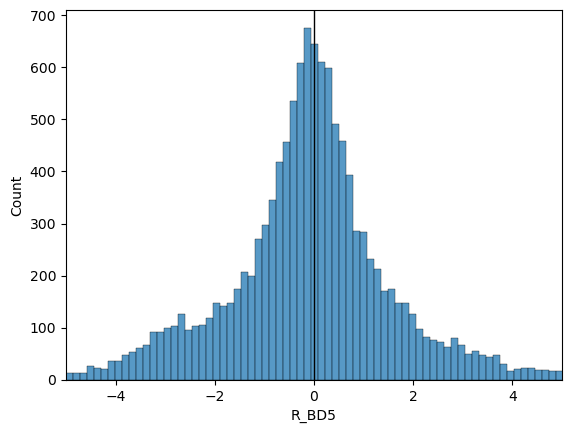

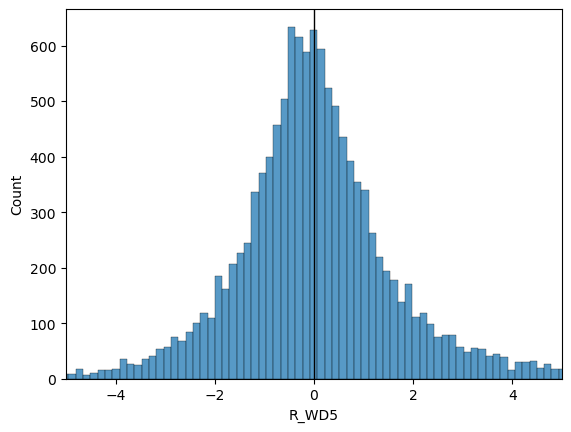

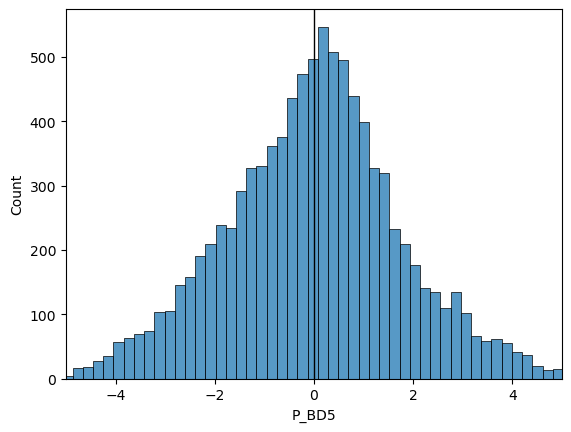

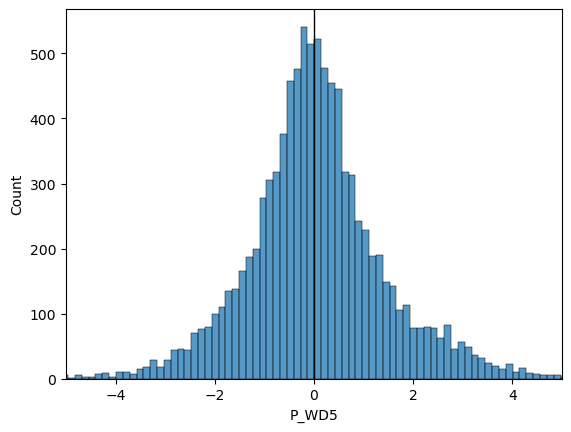

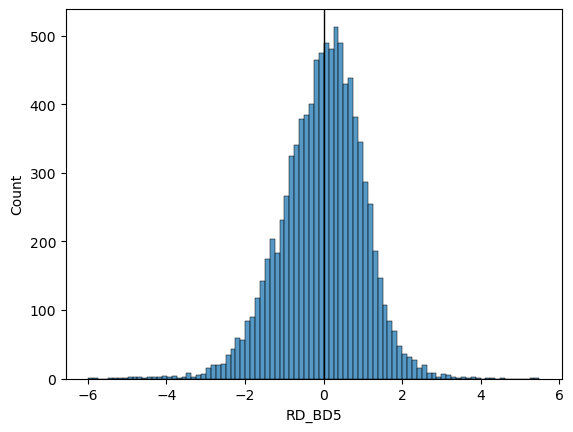

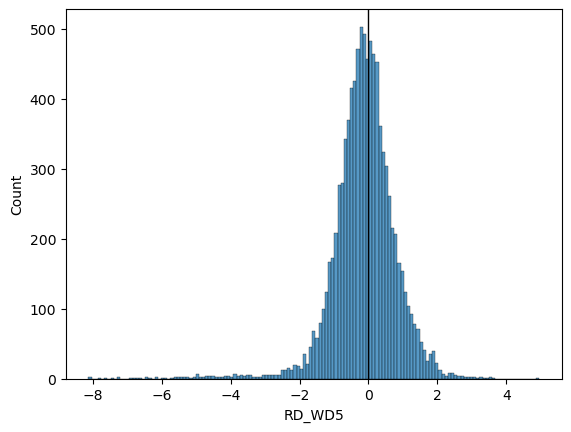

<Figure size 640x480 with 0 Axes>

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in RNA_avg_logFC.iloc[:,2:]:
    sns.histplot( RNA_avg_logFC[col] )
    plt.axvline(0, c='k', lw=1)
    plt.xlim(-5,5)
    plt.show()
    plt.clf()

for col in RPF_avg_logFC.iloc[:,2:]:
    sns.histplot( RPF_avg_logFC[col] )
    plt.axvline(0, c='k', lw=1)
    plt.xlim(-5,5)
    plt.show()
    plt.clf()


for col in RD_avg_logFC.iloc[:,2:]:
    sns.histplot( RD_avg_logFC[col] )
    plt.axvline(0, c='k', lw=1)
    plt.show()
    plt.clf()